# Load Dataset

In [1]:
import pandas as pd
import os
import numpy as np
from pathlib import Path
from pprint import pprint
import itertools

In [2]:
def tryconvert(x, to_type, default):
  '''
  Try convert `x` to a type specified by `to_type` function. 
  Returns `default` value if casting is not possibile 
  '''
  try:
    return to_type(x)
  except:
    return default

def load_data(directory, nrows=None, usecols=None, converters=None, dtype=None):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows, usecols=usecols, converters=converters, dtype=dtype))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

usecols = [" Total Length of Bwd Packets", " Fwd Packet Length Std", " Bwd Packet Length Min", " Bwd Packet Length Std", " Flow IAT Mean", " Flow IAT Min", "Init_Win_bytes_forward", " Init_Win_bytes_backward", " min_seg_size_forward", " Label"]

# Define column datatype when reading CSVs
converters = dict(itertools.product(usecols, [lambda x: tryconvert(x, float, np.nan)]))
converters[" Label"] = lambda x: x

# Load dataset
N_rows = 10
df = load_data(malware_dir, nrows=N_rows, usecols=usecols, converters=converters)

# shuffle dataset
# df = df.sample(frac=1).reset_index(drop=True)

# trim columns labels
df.columns = df.columns.str.strip()

# Drop rows which contain NaN values
df.dropna(inplace=True)

# Drop "MALWARE" or NaN rows
df.drop(df[(df['Label'] == '') | (df['Label'] == "MALWARE") | (df["Label"] == "BENIGN")].index, inplace = True)

df

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,212.0,567.535315,0.0,122.398257,1.521164e+05,146.0,65535.0,107.0,32.0,SMSMALWARE_JIFAKE
1,0.0,29.698485,0.0,0.000000,4.000000e+01,40.0,121.0,-1.0,32.0,SMSMALWARE_JIFAKE
2,0.0,24.248711,0.0,0.000000,3.505000e+02,317.0,7651.0,-1.0,32.0,SMSMALWARE_JIFAKE
3,212.0,567.535315,0.0,122.398257,1.633322e+05,45.0,65535.0,107.0,32.0,SMSMALWARE_JIFAKE
4,0.0,16.263456,0.0,0.000000,2.500000e+01,25.0,1419.0,-1.0,32.0,SMSMALWARE_JIFAKE
...,...,...,...,...,...,...,...,...,...,...
4255,0.0,17.897858,0.0,0.000000,1.728700e+04,146.0,1595.0,-1.0,32.0,ADWARE_SHUANET
4256,13133.0,189.560688,0.0,628.615032,3.305852e+04,6.0,65535.0,257.0,32.0,ADWARE_SHUANET
4257,0.0,0.000000,0.0,0.000000,8.380200e+03,13.0,1641.0,-1.0,32.0,ADWARE_SHUANET
4258,0.0,0.000000,0.0,0.000000,2.248000e+04,22480.0,1635.0,1613.0,32.0,ADWARE_SHUANET


In [3]:
df.shape

(4250, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4259
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Length of Bwd Packets  4250 non-null   float64
 1   Fwd Packet Length Std        4250 non-null   float64
 2   Bwd Packet Length Min        4250 non-null   float64
 3   Bwd Packet Length Std        4250 non-null   float64
 4   Flow IAT Mean                4250 non-null   float64
 5   Flow IAT Min                 4250 non-null   float64
 6   Init_Win_bytes_forward       4250 non-null   float64
 7   Init_Win_bytes_backward      4250 non-null   float64
 8   min_seg_size_forward         4250 non-null   float64
 9   Label                        4250 non-null   object 
dtypes: float64(9), object(1)
memory usage: 365.2+ KB


In [5]:
df.describe()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
count,4.250000e+03,4250.000000,4250.000000,4250.000000,4.250000e+03,4.250000e+03,4250.000000,4250.000000,4250.000000
mean,2.700928e+04,53.829941,1.288706,69.692842,4.883337e+05,2.545850e+05,14343.720706,1101.544000,30.616471
std,4.796449e+05,118.539414,21.110044,179.981474,2.256508e+06,1.786069e+06,25653.240875,4868.479969,3.832970
min,0.000000e+00,0.000000,0.000000,0.000000,3.000000e+00,-2.000000e+00,0.000000,-1.000000,20.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,6.220446e+03,3.700000e+01,1400.250000,-1.000000,32.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,3.636550e+04,7.055000e+02,1593.000000,179.000000,32.000000
75%,0.000000e+00,29.698485,0.000000,0.000000,5.208867e+04,3.703500e+04,2813.000000,383.000000,32.000000
max,2.864423e+07,773.250498,773.000000,938.039292,3.817054e+07,3.335190e+07,65535.000000,65535.000000,32.000000


<Axes: xlabel='Label', ylabel='# occurrences'>

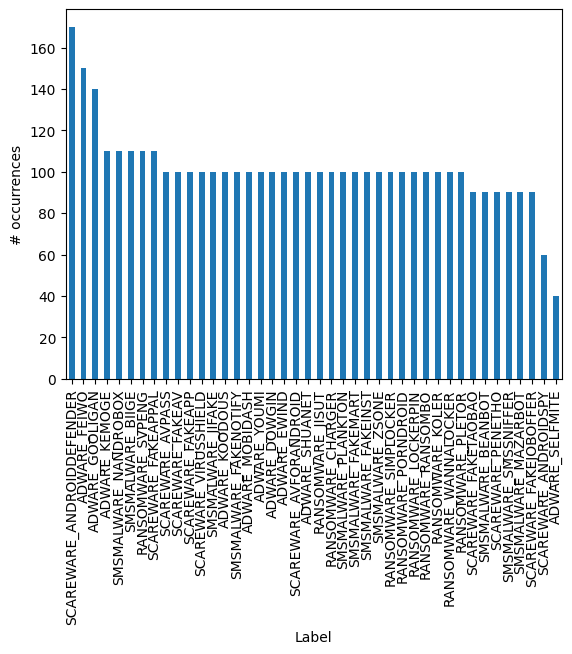

In [6]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

In [15]:
df['Label'].unique(), df['Label'].nunique()

(array(['SMSMALWARE_JIFAKE', 'SMSMALWARE_FAKENOTIFY',
        'SMSMALWARE_NANDROBOX', 'SMSMALWARE_MAZARBOT', 'SMSMALWARE_BIIGE',
        'SMSMALWARE_PLANKTON', 'SMSMALWARE_SMSSNIFFER',
        'SMSMALWARE_FAKEMART', 'SMSMALWARE_FAKEINST', 'SMSMALWARE_ZSONE',
        'SMSMALWARE_BEANBOT', 'RANSOMWARE_SIMPLOCKER',
        'RANSOMWARE_LOCKERPIN', 'RANSOMWARE_CHARGER',
        'RANSOMWARE_RANSOMBO', 'RANSOMWARE_KOLER',
        'RANSOMWARE_WANNALOCKER', 'RANSOMWARE_SVPENG', 'RANSOMWARE_PLETOR',
        'RANSOMWARE_PORNDROID', 'RANSOMWARE_JISUT',
        'SCAREWARE_FAKEJOBOFFER', 'SCAREWARE_AVFORANDROID',
        'SCAREWARE_AVPASS', 'SCAREWARE_FAKEAV', 'SCAREWARE_FAKEAPP',
        'SCAREWARE_PENETHO', 'SCAREWARE_FAKETAOBAO', 'SCAREWARE_FAKEAPPAL',
        'SCAREWARE_ANDROIDSPY', 'SCAREWARE_VIRUSSHIELD',
        'SCAREWARE_ANDROIDDEFENDER', 'ADWARE_SELFMITE', 'ADWARE_KOODOUS',
        'ADWARE_KEMOGE', 'ADWARE_GOOLIGAN', 'ADWARE_MOBIDASH',
        'ADWARE_YOUMI', 'ADWARE_DOWGIN', 'ADWARE_EWIND

# Data Preprocessing

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    if "Source IP" in df.columns:
        df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
    if "Flow ID" in df.columns:
        df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
    if "Destination IP" in df.columns:
        df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

    if "Timestamp" in df.columns:
        # drop column Timestamp
        df = df.drop(['Timestamp'], axis=1)    
    return df

df = data_preprocessing(df)
df.shape

(4250, 10)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((2550, 9), (1700, 9))

In [18]:
X_train.head()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
104,0.0,0.000000,0.0,0.000000,118503.000000,118503.0,1546.0,365.0,32.0
3797,48419.0,217.432285,0.0,463.519036,800981.098361,5.0,65535.0,362.0,32.0
4174,201.0,256.461823,0.0,50.078985,18634.500000,13.0,65535.0,122.0,32.0
3898,0.0,0.000000,0.0,0.000000,100888.000000,850.0,65535.0,14600.0,20.0
2118,0.0,0.000000,0.0,0.000000,37693.000000,37693.0,1548.0,391.0,32.0


In [19]:
y_train.head()

104      SMSMALWARE_FAKENOTIFY
3797              ADWARE_YOUMI
4174            ADWARE_SHUANET
3898             ADWARE_DOWGIN
2118    SCAREWARE_FAKEJOBOFFER
Name: Label, dtype: object

# Valutazione

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [21]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'Flow IAT Min <= 244305.5\ngini = 0.975\nsamples = 2550\nvalue = [63, 65, 98, 83, 67, 61, 64, 25, 58, 58, 66, 65\n55, 64, 57, 65, 50, 54, 63, 62, 96, 41, 55, 58\n57, 74, 61, 55, 54, 55, 65, 48, 60, 55, 66, 56\n57, 56, 57, 58, 59, 64]\nclass = ADWARE_FEIWO'),
 Text(0.25, 0.625, 'Init_Win_bytes_backward <= 288.5\ngini = 0.975\nsamples = 2407\nvalue = [63, 65, 95, 81, 63, 56, 61, 25, 55, 56, 64, 65\n52, 60, 18, 65, 50, 51, 57, 62, 93, 40, 54, 53\n51, 73, 55, 52, 50, 55, 62, 47, 56, 51, 64, 55\n56, 54, 51, 53, 59, 59]\nclass = ADWARE_FEIWO'),
 Text(0.125, 0.375, 'Init_Win_bytes_backward <= 150.0\ngini = 0.972\nsamples = 1305\nvalue = [30, 24, 49, 40, 23, 34, 19, 7, 26, 20, 54, 53\n39, 53, 16, 53, 35, 50, 44, 54, 35, 17, 23, 27\n22, 33, 25, 20, 24, 14, 22, 23, 21, 14, 32, 17\n29, 46, 30, 21, 36, 51]\nclass = RANSOMWARE_CHARGER'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Flow IAT Min <= 36406.5\ngini = 0.97\nsamples 

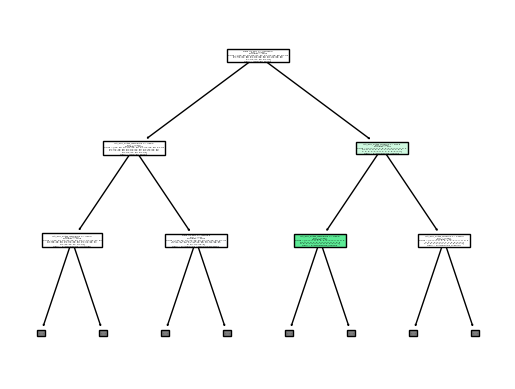

In [22]:
tree.plot_tree(decision_tree, filled=True, class_names=decision_tree.classes_, feature_names=X_train.columns, max_depth=2)

                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.06      0.05      0.06        37
             ADWARE_EWIND       0.10      0.11      0.10        35
             ADWARE_FEIWO       0.20      0.23      0.21        52
          ADWARE_GOOLIGAN       0.22      0.18      0.19        57
            ADWARE_KEMOGE       0.06      0.05      0.05        43
           ADWARE_KOODOUS       0.22      0.18      0.20        39
          ADWARE_MOBIDASH       0.17      0.17      0.17        36
          ADWARE_SELFMITE       0.14      0.13      0.14        15
           ADWARE_SHUANET       0.08      0.05      0.06        42
             ADWARE_YOUMI       0.08      0.07      0.07        42
       RANSOMWARE_CHARGER       0.20      0.21      0.20        34
         RANSOMWARE_JISUT       0.12      0.17      0.14        35
         RANSOMWARE_KOLER       0.14      0.13      0.13        45
     RANSOMWARE_LOCKERPIN       0.09      0.08      0.09     

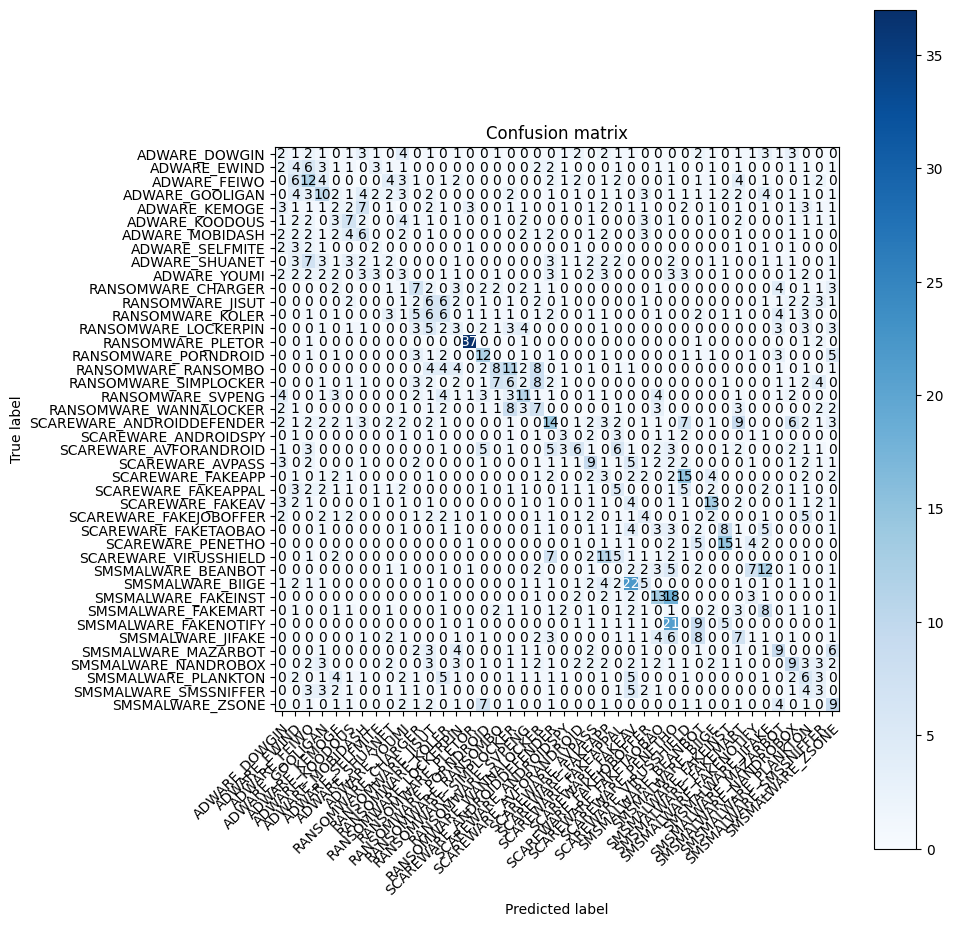

In [23]:
valuate(decision_tree, X_test, y_test)

In [24]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    decision_tree,
    X_train,
    y_train,
    cv=10,
    scoring=['precision_macro', 'recall_macro']
)

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(f'{10}-fold cross validation:')
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.15 (+/- 0.06)
Recall: 0.14 (+/- 0.06)


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.04      0.11      0.06        37
             ADWARE_EWIND       0.08      0.20      0.12        35
             ADWARE_FEIWO       0.05      0.13      0.08        52
          ADWARE_GOOLIGAN       0.11      0.19      0.14        57
            ADWARE_KEMOGE       0.05      0.14      0.08        43
           ADWARE_KOODOUS       0.06      0.10      0.08        39
          ADWARE_MOBIDASH       0.05      0.08      0.07        36
          ADWARE_SELFMITE       0.07      0.13      0.09        15
           ADWARE_SHUANET       0.05      0.05      0.05        42
             ADWARE_YOUMI       0.08      0.10      0.09        42
       RANSOMWARE_CHARGER       0.09      0.18      0.12        34
         RANSOMWARE_JISUT       0.07      0.14      0.09        35
         RANSOMWARE_KOLER       0.03      0.04      0.04        45
     RANSOMWARE_LOCKERPIN       0.13      0.22      0.16     

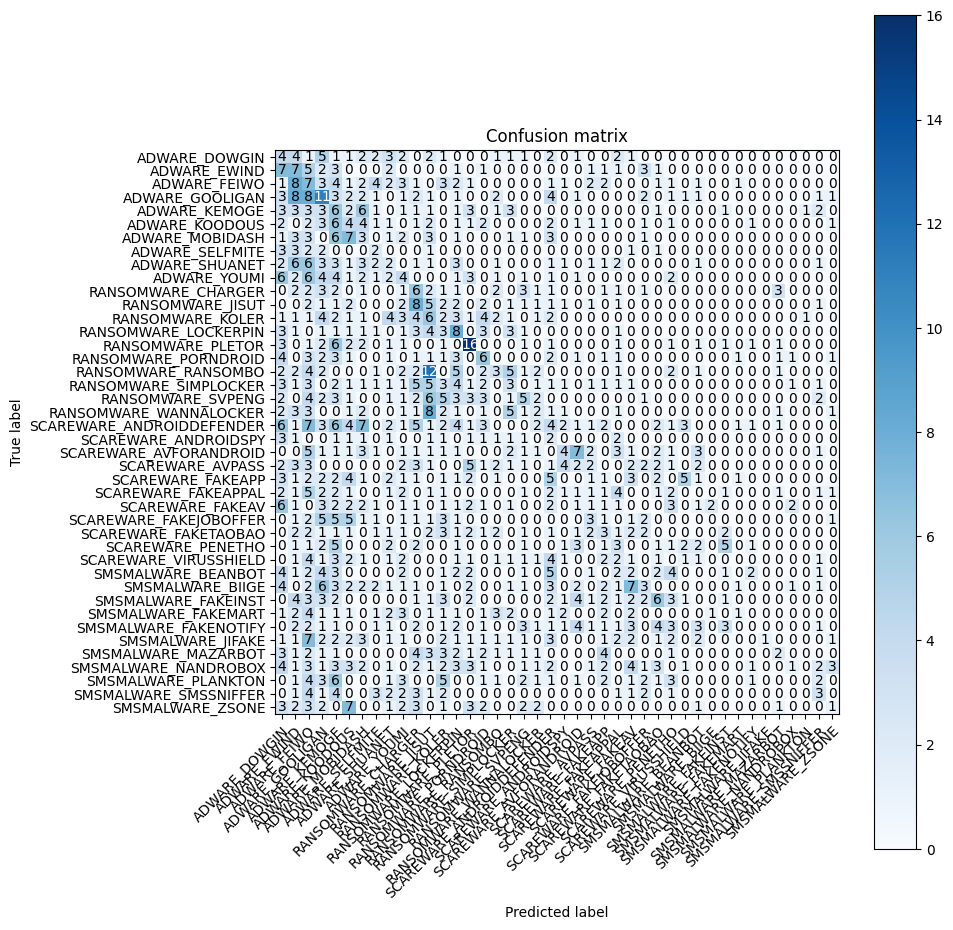

In [27]:
valuate(knn, X_test, y_test)

# Support Vector Machine

In [28]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

C=1.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train[:10_000], y_train[:10_000]) for clf in models]

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC:


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.00      0.00      0.00        37
             ADWARE_EWIND       0.00      0.00      0.00        35
             ADWARE_FEIWO       0.06      0.12      0.08        52
          ADWARE_GOOLIGAN       0.00      0.00      0.00        57
            ADWARE_KEMOGE       0.00      0.00      0.00        43
           ADWARE_KOODOUS       0.00      0.00      0.00        39
          ADWARE_MOBIDASH       0.00      0.00      0.00        36
          ADWARE_SELFMITE       0.00      0.00      0.00        15
           ADWARE_SHUANET       0.02      0.21      0.03        42
             ADWARE_YOUMI       0.00      0.00      0.00        42
       RANSOMWARE_CHARGER       0.00      0.00      0.00        34
         RANSOMWARE_JISUT       0.00      0.00      0.00        35
         RANSOMWARE_KOLER       0.00      0.00      0.00        45
     RANSOMWARE_LOCKERPIN       0.04      0.08      0.05     

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.00      0.00      0.00        37
             ADWARE_EWIND       0.00      0.00      0.00        35
             ADWARE_FEIWO       0.20      0.02      0.04        52
          ADWARE_GOOLIGAN       1.00      0.02      0.03        57
            ADWARE_KEMOGE       0.00      0.00      0.00        43
           ADWARE_KOODOUS       0.00      0.00      0.00        39
          ADWARE_MOBIDASH       0.00      0.00      0.00        36
          ADWARE_SELFMITE       0.00      0.00      0.00        15
           ADWARE_SHUANET       1.00      0.02      0.05        42
             ADWARE_YOUMI       0.50      0.02      0.05        42
       RANSOMWARE_CHARGER       0.00      0.00      0.00        34
         RANSOMWARE_JISUT       0.00      0.00      0.00        35
         RANSOMWARE_KOLER       0.00      0.00      0.00        45
     RANSOMWARE_LOCKERPIN       0.00      0.00      0.00     

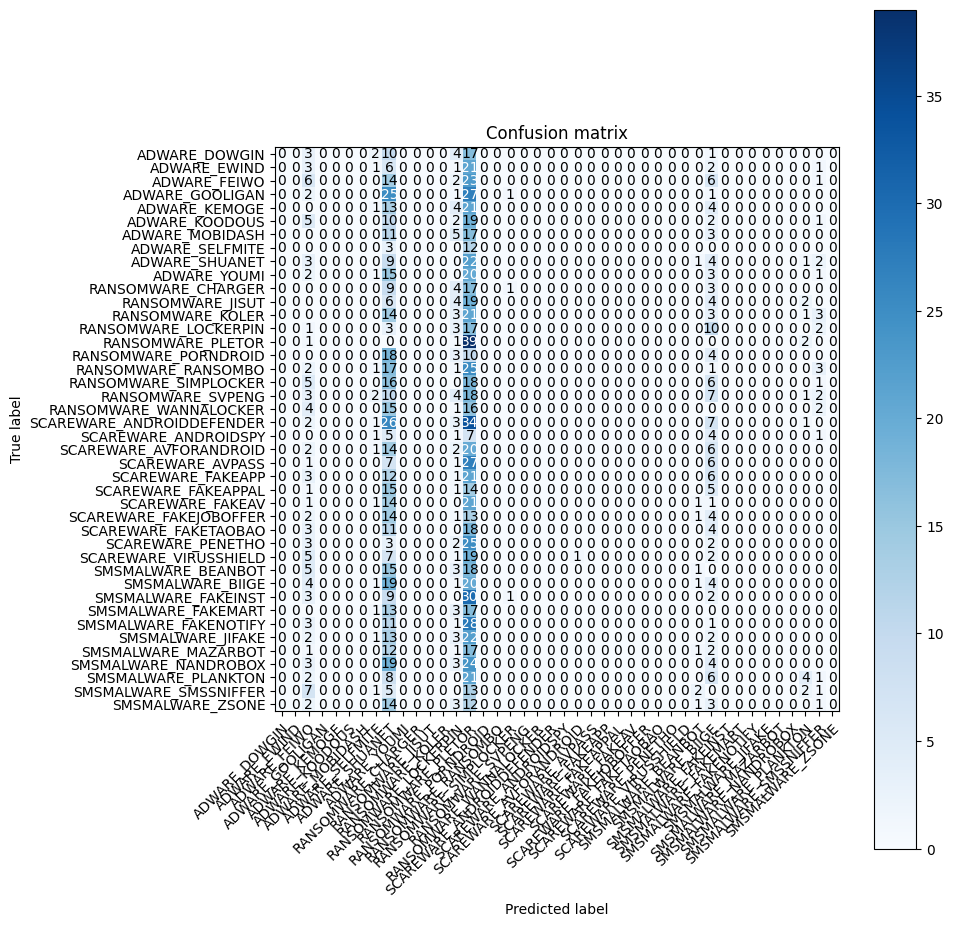

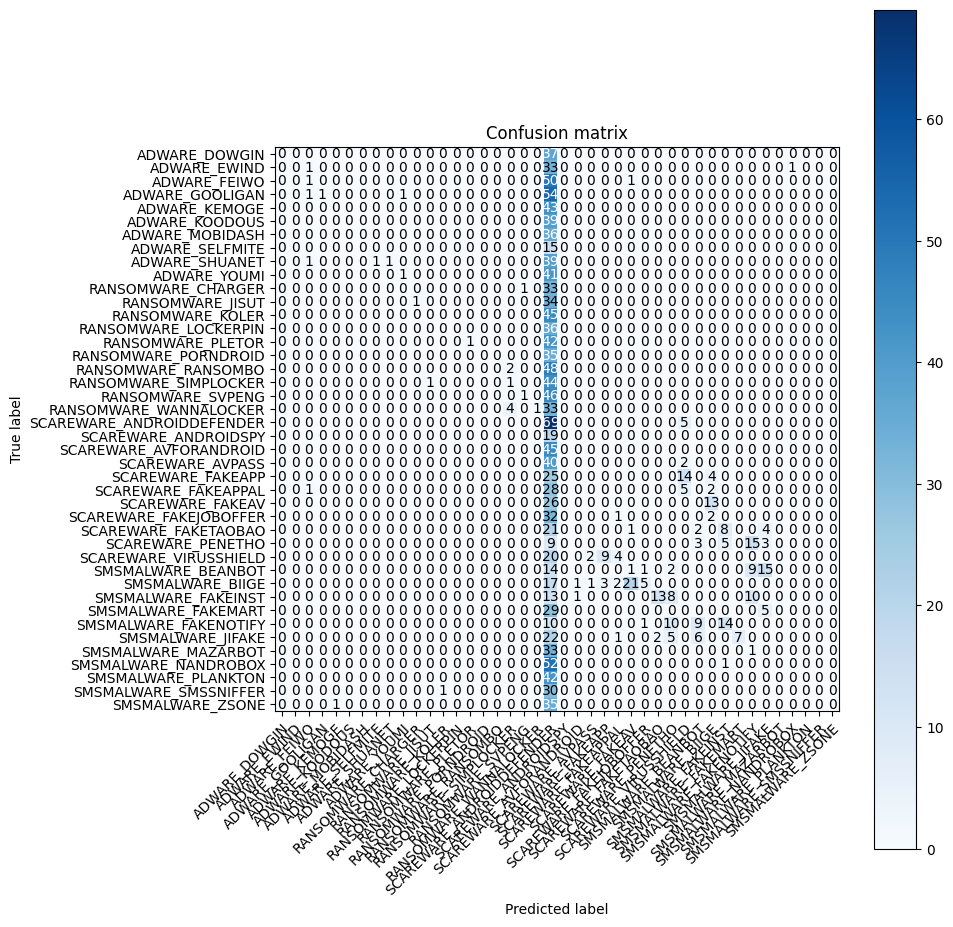

In [29]:
# valuate models

for clf in models:
    # print scores 
    print(f'{clf.__class__.__name__}:')
    valuate(clf, X_test[:4_000], y_test[:4_000])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.00      0.00      0.00        37
             ADWARE_EWIND       0.00      0.00      0.00        35
             ADWARE_FEIWO       0.00      0.00      0.00        52
          ADWARE_GOOLIGAN       0.05      0.37      0.09        57
            ADWARE_KEMOGE       0.00      0.00      0.00        43
           ADWARE_KOODOUS       0.02      0.46      0.04        39
          ADWARE_MOBIDASH       0.00      0.00      0.00        36
          ADWARE_SELFMITE       0.00      0.00      0.00        15
           ADWARE_SHUANET       0.00      0.00      0.00        42
             ADWARE_YOUMI       0.00      0.00      0.00        42
       RANSOMWARE_CHARGER       0.00      0.00      0.00        34
         RANSOMWARE_JISUT       0.00      0.00      0.00        35
         RANSOMWARE_KOLER       0.00      0.00      0.00        45
     RANSOMWARE_LOCKERPIN       0.00      0.00      0.00     

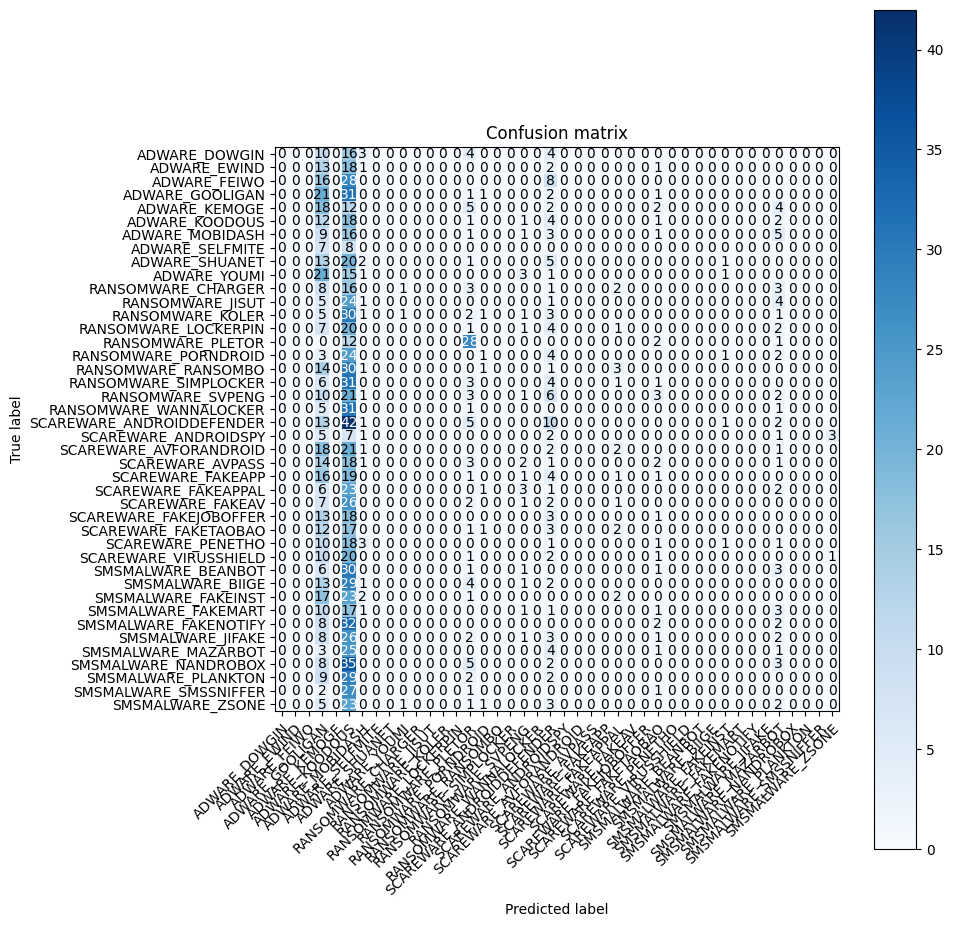

In [31]:
valuate(logistic_classifier, X_test, y_test)

# Gaussian Discriminant Analysis

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

            ADWARE_DOWGIN       0.00      0.00      0.00        37
             ADWARE_EWIND       0.00      0.00      0.00        35
             ADWARE_FEIWO       0.03      0.67      0.06        52
          ADWARE_GOOLIGAN       0.16      0.11      0.13        57
            ADWARE_KEMOGE       0.00      0.00      0.00        43
           ADWARE_KOODOUS       0.06      0.15      0.08        39
          ADWARE_MOBIDASH       0.15      0.06      0.08        36
          ADWARE_SELFMITE       0.00      0.00      0.00        15
           ADWARE_SHUANET       0.00      0.00      0.00        42
             ADWARE_YOUMI       0.00      0.00      0.00        42
       RANSOMWARE_CHARGER       0.07      0.03      0.04        34
         RANSOMWARE_JISUT       0.00      0.00      0.00        35
         RANSOMWARE_KOLER       0.00      0.00      0.00        45
     RANSOMWARE_LOCKERPIN       0.00      0.00      0.00     

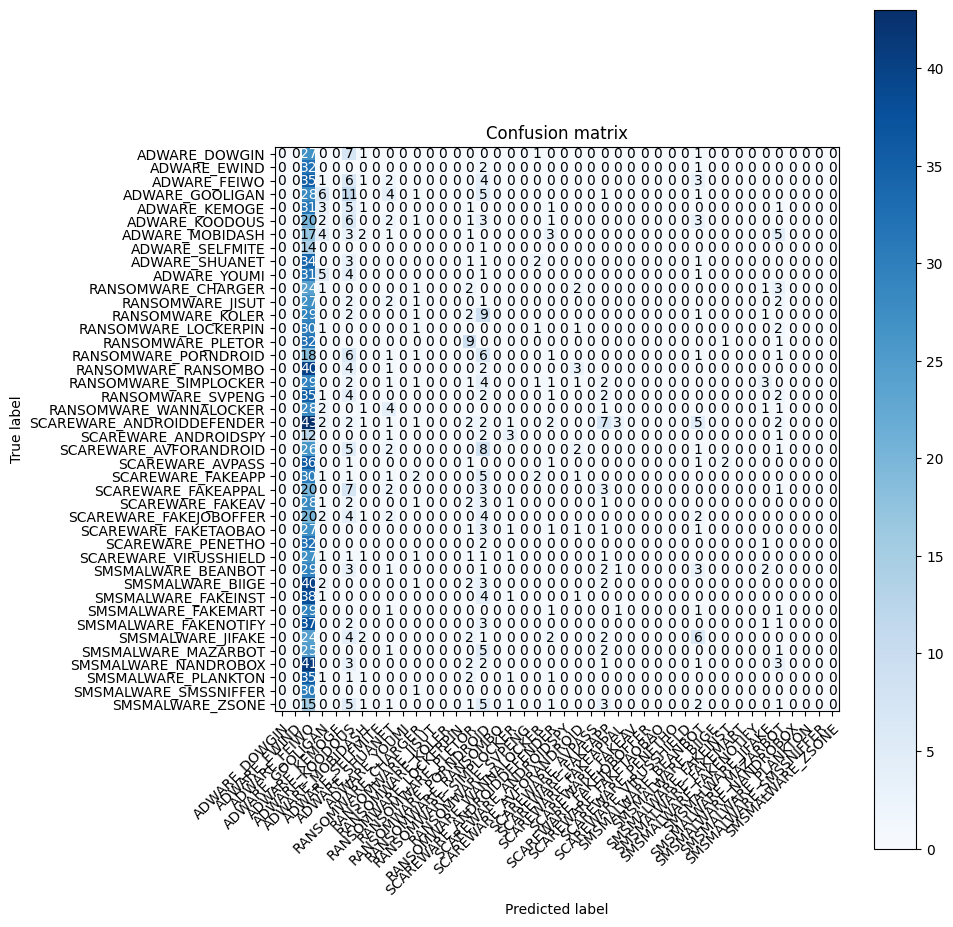

In [33]:
valuate(lda_classifier, X_test, y_test)

# MultiLayer Perceptron

In [37]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [38]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(y):
    y = y.values.reshape(-1, 1)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
    y = ohe.transform(y)
    return y

In [44]:
from torch import nn

class MultiClassNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(9, 18)
        self.hidden2 = nn.Linear(18, 32)
        self.act = nn.ReLU()
        self.output = nn.Linear(32, 42)

    def forward(self, x):
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.output(x)
        return x
    
model = MultiClassNN()

In [42]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(one_hot_encoding(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(one_hot_encoding(y_test), dtype=torch.float32)

In [45]:
import copy
import tqdm
from torch import optim

# loss metric and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 8
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 510/510 [00:09<00:00, 52.84batch/s, acc=0, loss=121]       


Epoch 0 validation: Cross-entropy=2599.49, Accuracy=2.8%


Epoch 1: 100%|██████████| 510/510 [00:10<00:00, 46.71batch/s, acc=0.2, loss=21.2]   


Epoch 1 validation: Cross-entropy=1163.55, Accuracy=3.7%


Epoch 2: 100%|██████████| 510/510 [00:09<00:00, 51.48batch/s, acc=0, loss=15.6]      


Epoch 2 validation: Cross-entropy=788.49, Accuracy=2.4%


Epoch 3: 100%|██████████| 510/510 [00:08<00:00, 61.82batch/s, acc=0.2, loss=3.21]   


Epoch 3 validation: Cross-entropy=294.13, Accuracy=2.5%


Epoch 4: 100%|██████████| 510/510 [00:08<00:00, 58.28batch/s, acc=0, loss=3.86]      


Epoch 4 validation: Cross-entropy=246.51, Accuracy=2.5%


Epoch 5: 100%|██████████| 510/510 [00:06<00:00, 74.00batch/s, acc=0, loss=3.82]      


Epoch 5 validation: Cross-entropy=187.87, Accuracy=2.9%


Epoch 6: 100%|██████████| 510/510 [00:08<00:00, 62.47batch/s, acc=0, loss=3.88]     


Epoch 6 validation: Cross-entropy=165.56, Accuracy=2.6%


Epoch 7: 100%|██████████| 510/510 [00:07<00:00, 67.63batch/s, acc=0, loss=3.85]   


Epoch 7 validation: Cross-entropy=11.08, Accuracy=3.2%


<All keys matched successfully>

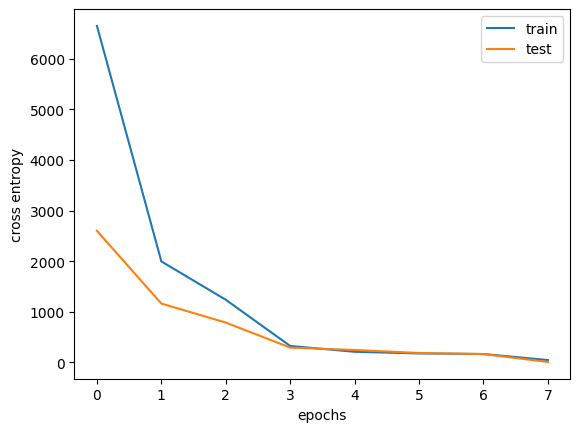

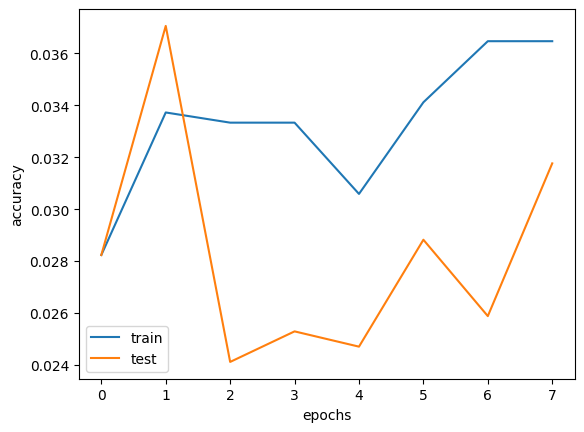

In [46]:
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()